#<div dir=rtl>
<h1> <b>توضیحات</b></h1>
</div>

<div dir=rtl>


BLEU اطلاعات جمله را منعکس نمی کند و محدودیتی برای ارائه آن وجود دارد. موسسه ملی استاندارد و فناوری (NIST) متریک را محاسبه می کند
شباهت با وزن دادن تطبیق n گرم بر اساس اطلاعات جمله. در روش محاسبه n گرم BLEU، تمام جفت های مرتب شده با یکسان محاسبه می شوند.وزن، اما در متریک NIST، وزن های بالاتری به جفت های مرتب شده داده می شود که اغلب ظاهر نمی شوند. این به این دلیل است که جفت های مرتب شده n-gram که کمتر ظاهر می شوند حاوی اطلاعات بیشتری یا مهمتر نسبت به جفت های مرتب شده n-gram معمولی هستند.سود اطلاعات وزنی برای کلمات n گرمی w1، به صورت زیر محاسبه می شود :

$info = \frac{occurrence-of-w_1 , . . . , w_n-1}{occurrence-of w_1 , . . . , w_n}$


حالا بریم در کد ببینیم :‌
</div>



```
  def __init__(self, n = 5):
    self.number_n_grams = n
```
<div dir=rtl>
مقدار n برای n-gram ها بنابر مقالات مرجع ۵ میباشد
</div>


```
  def nist_score(self, refs, pred):
    pred_ngrams = [ngrams(pred, n) for n in range(1 , self.number_n_grams + 1)]
    refs_ngrams = [[ngrams(ref, n) for n in range(1, self.number_n_grams + 1)] for ref in refs]
```

<div dir=rtl>
این متریک میتواند یک جمله ترجمه ماشینی را با چند جمله مرجع اندازه گیری کند پس مقدار n-gram ها را برای n ها مشخص شده به دست می آوریم.
</div>


```
    refs_ngrams_freq ,refs_total_words = dict() , 0
    for index in range(0, len(refs)):
      refs_total_words += len(refs[index].split())
      for num_gram in range(0, self.number_n_grams):
        count_ngrams = counter_element(refs_ngrams[index][num_gram])
        for element in count_ngrams:
          refs_ngrams_freq[element] = (refs_ngrams_freq[element] + count_ngrams[element]) if element in refs_ngrams_freq else 1

    info = self._info(refs_ngrams_freq, refs_total_words)
```
<div dir=rtl>

حالا برای محاسبه وزن ها باید دفعات تکرار عناصر n-gram ها را به دست آوریم. دقت کنیم که تمام عناصر در تمام جملات مرجع را باهم میسنجیم. یعنی اگر  عنصر x در جمله مرجع اول ۴ بار تکرار شده و در جمله مرجع دوم ۳ بار تکرار شده در کل تعداد تکرار عنصر x و ۷ بار است

</div>




```
  def _info(self, refs_ngrams_freq, refs_total_words):
    info = dict()
    for grams_1n in refs_ngrams_freq:
      grams_1m = grams_1n[ : -1] #w1, w2, ... wn-1
      occurrence = refs_ngrams_freq[grams_1m] if grams_1m and grams_1m in refs_ngrams_freq else refs_total_words
      info[grams_1n] = math.log(occurrence / refs_ngrams_freq[grams_1n], 2)
    return info
```
<div dir=rtl>

دقیقا طبق فرمول پیش میرویم ولی فرض کنید اگر در حالت unu-gram باشید یکی از عناصر شما ("school") باشد انگا با حذف اخرین عنصر دقیقا چیزی از این لیست نمیماند و نمیتوان تکرار لیست خالی را به دست اورد چون در لیست کلی ما نیست برای جبران اینکار صورت کسر را تعداد کلمات موجود در جملات مرجع در نظر میگیریم زیرا این کار باعث شده وزن بیشتری بگیرید یعنی برابری در سطخ unigram از اهمیت بیشتری برخورد دار است.

</div>





```
    nist_score , pred_lenght, ref_lenght = [], len(pred.split()), 0
    for n in range(0, self.number_n_grams):
      
      nist_precisions = list()
      for index_ref in range(0, len(refs)):
        ref_count_gram = counter_element(refs_ngrams[index_ref][n])
        pred_coumt_gram = counter_element(pred_ngrams[n])
        overlaps_ngram = overlaps_dict(ref_count_gram, pred_coumt_gram)
        numerator = sum([info[n_gram] * count for n_gram, count in overlaps_ngram.items()])
        denominator = sum(pred_coumt_gram.values())
        nist_precisions.append(numerator / denominator)
      nist_score.append(max(nist_precisions))
      ref_lenght += len(refs[nist_precisions.index(max(nist_precisions))].split())
```

<div dir=rtl>

طبق تناظر یک به یک جملات را با  n-gram های یکسان مقایسه کرده
سپس هر جمله مرجع را با جمله ترجمه شده توسط ماشین امتیاز را حساب کرده نحوه محاسبه امتیاز به شکل زیر است  

و در اخر همه امتیازات را برای n-gram های مختلف جمع میکنیم
</div>


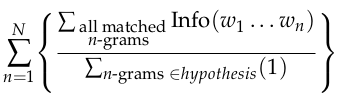

<div dir=rtl>

پس از محاسبه برای هر جمله مرجع نسبت به ترجمه ماشینی جمله مرجعی که
بیشترین امتیاز را دارد به عنوان امتیاز در این n-gramمخصوص انتخاب میکنیم

</div>





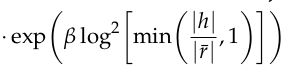

<div dir=rtl>

در اخر برای محاسبه جریمه باید جمله مرجعی که در n-gramخاص خود بیشترین امتیاز را با ترجمه ماشینی داشته اندازه ان را حساب کرده و در اخر میانگین آن را گرفته و به تابع جریمه ارسال کنیم


در اینجا، β به گونه ای انتخاب می شود که ضریب جریمه اختصار = 0.5 باشد، زمانی که تعداد کلمات در فرضیه 2/3 از میانگین تعداد کلمات مرجع باشد.

پس برای β داریم ‌:
</div>


$(exp(\beta * log ^ 2 (min(\frac{|h|}{|r̄|}), 1)) = BP$



$\Downarrow{if (\frac{|h|}{|r̄|} = \frac{2}{3})}$



$\Downarrow{BP= 0.5}$

$(exp(\beta * log ^ 2 (min(\frac{2}{3}), 1) = \frac{1}{2})$

$\Downarrow{Log-From-2-sides}$

$\Downarrow$

$(\beta * log ^ 2 (\frac{2}{3}) = log(\frac{1}{2}))$

$\Downarrow$

$(\beta = \frac{log(\frac{1}{2})}{log ^ 2 (\frac{3}{2})})$




```

  def _length_penalty(self, refs_lenght, pred_lenght):

    ratio = pred_lenght / refs_lenght
    if 0 < ratio < 1:
        beta = math.log(0.5) / math.log(1.5) ** 2
        return math.exp(beta * math.log(ratio) ** 2)
    else:  
        return 1
```
<div dir=rtl>
در اخر برای محاسبه امتیاز نهایی داریم :‌
</div>



```
    return sum(nist_score) * self._length_penalty(ref_lenght / len(refs), pred_lenght)

```




#<div dir=rtl>
<h1> <b>کد</b></h1>
</div>



##<div dir=rtl>
<h3> <b>ابزار ها</b></h3>
</div>

In [ ]:
def counter_element(temp):
  counter = {}
  for element in temp:
    counter[element] = counter[element] + 1 if element in counter else 1
  return counter



def ngrams(text, n, ignore_split = False):
  if ignore_split:
    return [tuple(text[index : index + n]) for index in range(0, len(text) - n + 1)]
  else:

    text = text.lower()
    words = text.split()
    return [tuple(words[index : index + n]) for index in range(0, len(words) - n + 1)]

def overlaps_dict(dict1, dict2):

  overlaps = dict()
  for key in dict1:
    if key in dict2:
      _val_overlaps = min(dict1[key], dict2[key])
      overlaps.update({key : _val_overlaps})
  return overlaps

##<div dir=rtl>
<h3> <b>کد اصلی</b></h3>
</div>

In [ ]:
import math

class nist:

  def __init__(self, n = 5):

    self.number_n_grams = n

  def nist_score(self, refs, pred):

    pred_ngrams = [ngrams(pred, n) for n in range(1 , self.number_n_grams + 1)]
    refs_ngrams = [[ngrams(ref, n) for n in range(1, self.number_n_grams + 1)] for ref in refs]

    refs_ngrams_freq ,refs_total_words = dict() , 0
    for index in range(0, len(refs)):
      refs_total_words += len(refs[index].split())
      for num_gram in range(0, self.number_n_grams):
        count_ngrams = counter_element(refs_ngrams[index][num_gram])
        for element in count_ngrams:
          refs_ngrams_freq[element] = (refs_ngrams_freq[element] + count_ngrams[element]) if element in refs_ngrams_freq else 1

    info = self._info(refs_ngrams_freq, refs_total_words)

    nist_score , pred_lenght, ref_lenght = [], len(pred.split()), 0
    for n in range(0, self.number_n_grams):

      nist_precisions = list()
      for index_ref in range(0, len(refs)):
        ref_count_gram = counter_element(refs_ngrams[index_ref][n])
        pred_coumt_gram = counter_element(pred_ngrams[n])
        overlaps_ngram = overlaps_dict(ref_count_gram, pred_coumt_gram)
        numerator = sum([info[n_gram] * count for n_gram, count in overlaps_ngram.items()])
        denominator = sum(pred_coumt_gram.values())
        nist_precisions.append(numerator / denominator)
      nist_score.append(max(nist_precisions))
      ref_lenght += len(refs[nist_precisions.index(max(nist_precisions))].split())

    return sum(nist_score) * self._length_penalty((ref_lenght / self.number_n_grams), pred_lenght)




  def _info(self, refs_ngrams_freq, refs_total_words):

    info = dict()
    for grams_1n in refs_ngrams_freq:
      grams_1m = grams_1n[ : -1] #w1, w2, ... wn-1
      occurrence = refs_ngrams_freq[grams_1m] if grams_1m and grams_1m in refs_ngrams_freq else refs_total_words
      info[grams_1n] = math.log(occurrence / refs_ngrams_freq[grams_1n], 2)
    return info



  def _length_penalty(self, refs_lenght, pred_lenght):

    ratio = pred_lenght / refs_lenght
    if 0 < ratio < 1:
        beta = math.log(0.5) / math.log(1.5) ** 2
        return math.exp(beta * math.log(ratio) ** 2)
    else:
        return 1

##<div dir=rtl>
<h3> <b>تست کد با مثال</b></h3>
</div>

In [ ]:
model = nist()

##<div dir=rtl>
<h4> <b>جملات یکسان</b></h4>
</div>

In [ ]:
ref = "this is a blue ball and it is beatiful"
pred = "this is a blue ball and it is beatiful"
model.nist_score([ref], pred)

3.1699250014423126

##<div dir=rtl>
<h4> <b>جملات کاملا متفاوت ۱</b></h4>
</div>

In [ ]:
ref = "this is a blue ball and it is beatiful"
pred = "Recall is the percent of positive cases"
model.nist_score([ref], pred)

0.0

#<div dir=rtl>
<h1> <b>نتیجه گیری</b></h1>
</div>

<div dir=rtl>

عدد خروجی این متریک بین صفر و 3.19 است

* 3.19 به معنای تطابق صد در صدی با جمله مرجع

* صفر به معنای عدم تطابق صد در صدی با جمله مرجع

</div>

#<div dir=rtl>
<h1> <b>منابع</b></h1>
</div>

* [ref - 1](https://dl.acm.org/doi/pdf/10.5555/1289189.1289273)

* [ref - 2](https://www.mdpi.com/2227-7390/11/4/1006)